In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
Xdf, ydf = mnist['data'], mnist['target']
X = Xdf.to_numpy()
y = ydf.to_numpy()
y = y.astype(np.uint8)
y[0]

5

Saving figure some_digit_plot


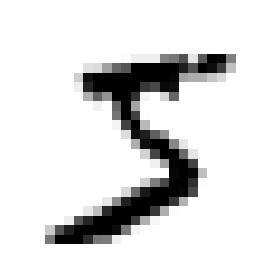

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from time import time
from sklearn.model_selection import cross_val_predict

start = time()
scaler = preprocessing.StandardScaler().fit(X_train.astype(np.float64))
X_scaled = scaler.transform(X_train)

knc_clf = KNeighborsClassifier()
param_grid=[{'n_neighbors': [3, 4, 5], 'weights': ('uniform', 'distance')}]
knc_clf_grid = GridSearchCV(knc_clf, param_grid, n_jobs = 10, cv = 5, verbose = 3)
knc_clf_grid.fit(X_train, y_train)
print(time()-start)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
177.62899923324585


In [10]:
print(knc_clf_grid.best_params_)
print(knc_clf_grid.cv_results_)
print(knc_clf_grid.best_score_)

{'n_neighbors': 4, 'weights': 'distance'}
{'mean_fit_time': array([0.59980111, 0.6044023 , 0.93840094, 0.79179401, 0.78399577,
       0.92940297]), 'std_fit_time': array([0.01430266, 0.01902199, 0.14610593, 0.14334058, 0.09560225,
       0.12894427]), 'mean_score_time': array([57.93200188, 57.34800024, 57.06139951, 57.90699835, 55.89360085,
       54.76260853]), 'std_score_time': array([0.9464402 , 0.46748277, 3.21402011, 0.88623779, 0.78115916,
       0.73511171]), 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 5, 5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 4, 'weigh

In [12]:
from sklearn.metrics import accuracy_score

y_pred = knc_clf_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [13]:
from sklearn.metrics import confusion_matrix
#y_train_pred = cross_val_predict(knc_clf_grid, X_scaled, y_train, cv=3)
confusion_matrix(y_pred, y_test)

array([[ 973,    0,   10,    0,    1,    4,    4,    0,    5,    3],
       [   1, 1132,    5,    1,    5,    0,    2,   17,    2,    4],
       [   1,    2,  995,    3,    0,    0,    0,    4,    4,    2],
       [   0,    0,    2,  974,    0,    9,    0,    0,   14,    7],
       [   0,    0,    1,    1,  950,    2,    3,    3,    5,    9],
       [   1,    0,    0,   14,    0,  862,    3,    0,   11,    4],
       [   3,    1,    0,    1,    4,    7,  946,    0,    4,    1],
       [   1,    0,   16,    7,    3,    1,    0,  994,    4,   10],
       [   0,    0,    3,    4,    0,    3,    0,    0,  920,    1],
       [   0,    0,    0,    5,   19,    4,    0,   10,    5,  968]],
      dtype=int64)

## Create function to shift images up, down, left, right by 1 pixel.  Append these images to the training set 

In [96]:
from scipy.ndimage import shift

def image_shift(data):
    images = data.reshape(len(data),28,28)
    images_shifted_left = shift(images, [0, 0, -1])
    images_shifted_right = shift(images, [0, 0, 1])
    images_shifted_up = shift(images, [0, -1, 0])
    images_shifted_down = shift(images, [0, 1, 0])
    
    data_shifted_left = images_shifted_left.reshape(len(images_shifted_left), 28*28)
    data_shifted_right = images_shifted_right.reshape(len(images_shifted_right), 28*28)
    data_shifted_up = images_shifted_up.reshape(len(images_shifted_up), 28*28)
    data_shifted_down = images_shifted_down.reshape(len(images_shifted_down), 28*28)
    
    return np.vstack((data, data_shifted_left, data_shifted_right, data_shifted_up, data_shifted_down))

X_train_shifted = image_shift(X_train)
print(X_train_shifted.shape)
y_train_shifted = np.concatenate((y_train, y_train, y_train, y_train, y_train))
print(y_train_shifted.shape)

(300000, 784)
(300000,)


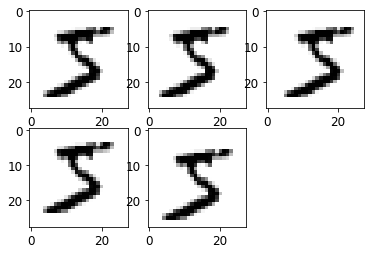

In [98]:
plt.subplot(231)
plt.imshow(X_train_shifted[0].reshape(28,28), cmap=mpl.cm.binary)
plt.grid('on')
plt.subplot(232)
plt.imshow(X_train_shifted[60000].reshape(28,28), cmap=mpl.cm.binary)
plt.subplot(233)
plt.imshow(X_train_shifted[120000].reshape(28,28), cmap=mpl.cm.binary)
plt.subplot(234)
plt.imshow(X_train_shifted[180000].reshape(28,28), cmap=mpl.cm.binary)
plt.subplot(235)
plt.imshow(X_train_shifted[240000].reshape(28,28), cmap=mpl.cm.binary)

In [116]:
start = time()

knc_clf_shifted = KNeighborsClassifier(**knc_clf_grid.best_params_)
knc_clf_shifted.fit(X_train_shifted, y_train_shifted)

print(time()-start)

0.34401440620422363


In [117]:
y_pred = knc_clf_shifted.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

In [ ]:
confusion_matrix(y_pred, y_test)

## Try scaling the input

In [109]:
start = time()

scaler = preprocessing.StandardScaler()
X_train_shifted_scaled = scaler.fit_transform(X_train_shifted.astype(np.float64))

# Fit using standard scaling on inputs
knc_clf_shifted_scaled = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knc_clf_shifted_scaled.fit(X_train_shifted_scaled, y_train_shifted)

print(time()-start)

3.5730247497558594


In [111]:
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
y_pred = knc_clf_shifted_scaled.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9563

In [112]:
confusion_matrix(y_pred, y_test)

array([[ 966,    0,   11,    0,    0,    3,    5,    2,   10,    5],
       [   1, 1129,    7,    2,    6,    2,    3,   22,    1,    7],
       [   0,    4,  973,    3,    6,    1,    0,   11,    4,    5],
       [   1,    0,    8,  977,    2,   22,    0,    0,   21,    8],
       [   0,    1,    1,    1,  932,    3,    2,    9,    8,    9],
       [   3,    0,    0,   13,    1,  845,    6,    0,   28,    4],
       [   7,    0,    2,    0,    5,    7,  941,    0,    3,    0],
       [   1,    0,   18,    9,    5,    2,    0,  964,    6,   18],
       [   1,    0,    7,    3,    2,    2,    1,    0,  888,    5],
       [   0,    1,    5,    2,   23,    5,    0,   20,    5,  948]],
      dtype=int64)

## Titanic Data Set

In [120]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()  

In [124]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [128]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
